In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def minimize(X, y, m):
    xlist = []
    ylist = []
    for i in range(2*m + 1):
        xlist.append(np.sum(X**i))  # x^0, x^1, ..., x^{2m}

    xx = np.array(xlist)
    
    A = np.zeros((m + 1, m + 1))
    for i in range(m+1):
        A[i, :] = xx[i:i+m+1]  # x^i, x^{i + 1}, ... , x^{i + m}
        ylist.append(np.sum(y*X**i))  # y*x^0, y*x^1, ..., y*x^{m}

    yy = np.array(ylist)
    b = yy

    a = np.linalg.solve(A, b)  # solve Ax = b, get a

    def func(x):
        res = []
        for xx in x:
            X = [xx**i for i in range(m+1)]  # x^0, x^1, ..., x^{m}
            res.append(np.dot(X, a))  # x^0 * a[0] + x^1 * a[1] + ... + x^{m} * a[m]

        return np.array(res)
    return func, a  # return the function and the coefficients 

In [81]:
# e.g. on ppt 
X = [1, 2, 3, 4, 6, 7, 8]
y = [2, 3, 6, 7, 5, 3, 2]
X = np.array(X)
y = np.array(y)

func, a = minimize(X, y, 2)
print(a)

[-1.3182  3.4318 -0.3864]


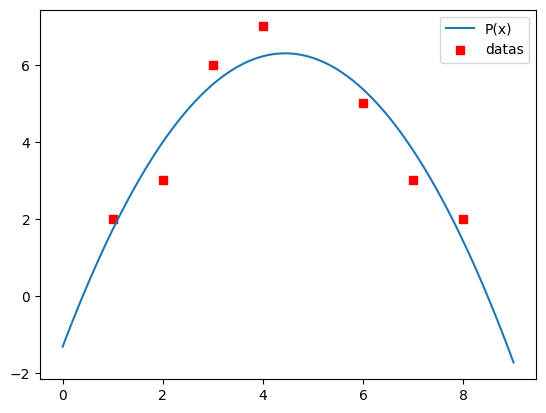

In [82]:
# visualize
x = np.linspace(0, 9, 100)

plt.plot(x, func(x), label='P(x)')
plt.scatter(X, y, color='r', marker='s', label='datas')
plt.legend()
plt.show()

## Problem on instrcution book

[58.1151 -0.6403  0.0613  0.0052]


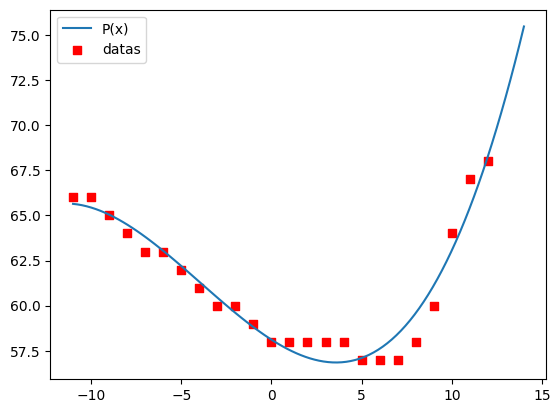

In [83]:
X = np.array([x for x in range(-11, 13)])   # use 0 o'clock today as 0 
y = np.array([66, 66, 65, 64, 63, 63, 62, 61, 60, 60, 59, 58, 58, 58, 58, 58, 57, 57, 57, 58, 60, 64, 67, 68])

func, a = minimize(X, y, 3)
np.set_printoptions(precision=4, suppress=True)
print(a)

x = np.linspace(-11, 14, 100)

plt.plot(x, func(x), label='P(x)')
plt.scatter(X, y, color='r', marker='s', label='datas')
plt.legend()
plt.show()